In [2]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy
import torch

In [296]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from scipy.stats import mode
from collections import Counter

In [153]:
df_test = pd.read_csv("test.csv", header=None)
df_test = df_test.as_matrix()

In [332]:
"""
Read in train and test as Pandas DataFrames
"""
nrows = 2000
df_train = pd.read_csv("train.csv", nrows = nrows, header=None)

# later on, we can process chunks using chunkiter
df_train = df_train.as_matrix()

In [333]:
df_test.shape

(1000, 88201)

In [334]:
# df_test.head()
split = int(nrows * 0.8)
# print (split)
train_set = df_train[:split]
val = df_train[split:]

print (train_set.shape)
print (val.shape)

(1600, 88201)
(400, 88201)


In [335]:
def acc(preds, t_validate):
    return np.sum(preds == np.array(t_validate)) / len(preds)

X_train = train_set[:,:-1]
Y_train = train_set[:,-1]

X_val = val[:,:-1]
Y_val = val[:,-1]

X_test = df_test[:,1:]

In [412]:
# a sample - extracting MFCC from the first audio file
SAMPLE_RATE = 22050
feats = extract_features(X_train[0:2])
print (feats.shape)
print (feats)
# librosa.display.specshow(feats, x_axis='time')
# plt.colorbar()
# plt.title('MFCC')
# plt.tight_layout()

(2, 32)
(2, 32)
[[ -9.14263431e+01   1.25182869e+02  -2.20177046e+01   4.34730615e+01
   -1.32595583e+01   1.15865899e+00   1.26806292e+01   3.20957989e+00
    3.64353469e+00   7.09099471e+00  -9.04655298e+00   1.32091604e+01
   -7.56609499e-01   5.72818423e+00  -1.81973900e+00   6.48612086e+00
   -7.68844657e+00   1.78348467e+00  -3.49108957e+00   4.09210852e-01
    8.77373670e-01   8.36131713e-01   8.01219949e-01   7.41774177e-01
    7.30341092e-01   7.48406379e-01   7.28663926e-01   6.89994553e-01
    6.76026192e-01   7.50639480e-01   9.43005761e-01   8.88098930e-01]
 [ -7.72972228e+02   4.78841074e+01   4.46203627e+01   4.27198764e+01
    4.12014343e+01   3.91010159e+01   3.67176536e+01   3.40757748e+01
    3.11813277e+01   2.81209052e+01   2.48825346e+01   2.15659860e+01
    1.82113725e+01   1.48406743e+01   1.15404973e+01   8.33154362e+00
    5.25950452e+00   2.36863625e+00  -3.34830550e-01  -2.80540437e+00
    4.60919349e-02   3.41198977e-02   3.97126023e-02   8.06551688e-02
   

/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [437]:
def extract_features(data):
    train = []
    for sound in data:
        features = []
        # mfcc
        mfcc = librosa.feature.mfcc(sound, sr=SAMPLE_RATE, n_mfcc=20)
#         mfcc = np.ravel(mfcc)
        mfcc = np.mean(mfcc, axis=1)
#         print (mfcc.shape)
        features.extend(mfcc)
        
#         # stft
#         stft = np.abs(librosa.core.stft(sound))
#         chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=SAMPLE_RATE),axis=1)
#         features.extend(chroma)
        
        train.append(features)
    train = np.array(train)
    print (train.shape)
    return train

In [438]:
train = extract_features(X_train)
validation = extract_features(X_val) 
test = extract_features(X_test)

(1600, 20)
(400, 20)
(1000, 20)


In [439]:
print (train.shape)
print ("learning...")
clf = RandomForestClassifier()
clf.fit(train, Y_train)

(1600, 20)
learning...


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [440]:
log_clf = LogisticRegression()
log_clf.fit(train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [441]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [442]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(2000))
mlp_clf.fit(train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2000, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [443]:
rf_pred = clf.predict(validation)
# print (rf_pred)
print ("rf acc: ", acc(rf_pred, Y_val))

log_pred = log_clf.predict(validation)
# print (log_pred)
print ("log acc: ", acc(log_pred, Y_val))

gb_pred = gb_clf.predict(validation)
print ("gb acc: ", acc(gb_pred, Y_val))

mlp_pred = mlp_clf.predict(validation)
print ("mlp acc: ", acc(mlp_pred, Y_val))

rf acc:  0.86
log acc:  0.8125
gb acc:  0.88
mlp acc:  0.91


In [444]:
# pick plurality vote among multiple predictors
def ensemble_pred(preds):
    return mode(preds)[0][0]

ensemble = np.array([rf_pred, log_pred, gb_pred, mlp_pred])
en_pred = ensemble_pred(ensemble)
print ("ens acc: ", acc(en_pred, mlp_pred))

ens acc:  0.9375


In [436]:
# trying to predict on the test set
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i) + "," + str(int(p)) + "\n")

log_preds_f = log_clf.predict(test)
rf_preds_f = clf.predict(test)
mlp_preds_f = mlp_clf.predict(test)
gb_preds_f = gb_clf.predict(test)

ensemble = np.array([rf_preds_f, log_preds_f, gb_preds_f, mlp_preds_f])
en_preds_f = ensemble_pred(ensemble)
write_to_file("pred.csv", en_preds_f)

In [435]:
print (X_test.shape)
testing = (np.sum(X_test, axis=1))
zeroes = np.where(testing == 0)[0]
# print (testing)
# print (log_preds_f[zeroes])
# print (rf_preds_f[zeroes])
print (en_preds_f[zeroes])
# en_preds_f[zeroes] = 7
# print (en_preds_f[zeroes])

print (Counter(en_preds_f))

(1000, 88200)
[ 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.]
Counter({0.0: 356, 7.0: 211, 4.0: 106, 8.0: 77, 2.0: 69, 9.0: 60, 5.0: 51, 3.0: 41, 1.0: 26, 6.0: 3})


# Listening to the audio
This code enables you to listen to a sample sine wave audio.

In [12]:
SAMPLE_RATE = 22050

librosa.feature.mfcc(df_train, 

In [22]:
T = 4.0    # seconds
t = np.linspace(0, T, int(T*SAMPLE_RATE), endpoint=False) # time variable
freq = 440
signal = np.sin(2*np.pi*freq*t)
ipd.Audio(signal, rate=SAMPLE_RATE)

# Creating spectrograms
Spectrograms provide a 2D feature space to analyze signals in the joint time-frequency domain.

This code generates the spectrogram files for use with the CNN example. It makes files for non-noised data!

In [23]:
# Just some re-shaping and dimension finding
N = 1
print ("N:",N)
train = signal[np.newaxis,:]
print ("Train shape",train.shape)
N_train = train.shape[0]
NUM_SAMPLES = train.shape[1]-1

X_train = train[:,:-1]
y_train = train[:,-1]
y_train = y_train.reshape(N_train,1)

N: 1
Train shape (1, 88200)


In [24]:
# JUST SOME FOURIER TRANSFORM PARAMETERS
BINS_OCTAVE = 12*2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES

In [25]:
# Given a wav time series, makes a mel spectrogram
# which is a short-time fourier transform with
# frequencies on the mel (log) scale.
def mel_spec(y):
    Q = librosa.cqt(y=y, sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    Q_db = librosa.amplitude_to_db(Q,ref=np.max)
    return Q_db

In [26]:
# This means that the spectrograms are 168 rows (frequencies)
# By 173 columns (time frames)
song = X_train[0]
test_spec = mel_spec(song)
print (test_spec.shape)
FEATS = test_spec.shape[0]
FRAMES = test_spec.shape[1]

(168, 173)


/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [27]:
tmp_train = np.zeros((N_train,FEATS,FRAMES))
for i in range(N_train):
    tmp_train[i,:,:] = mel_spec(X_train[i])
#np.save('Data/xtrain_spec', tmp_train)

/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


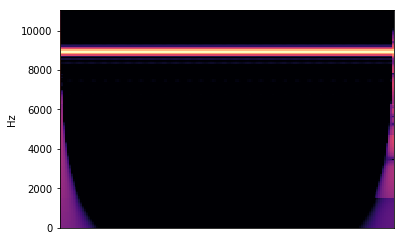

In [28]:
librosa.display.specshow(tmp_train[0], y_axis='hz')

In [21]:
print (tmp_train.shape)

(1, 168, 173)
